In [80]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Create basic Plots with Pandas, Seaborn, and Numpy

In [7]:
data = np.arange(10)
print(data)

[0 1 2 3 4 5 6 7 8 9]


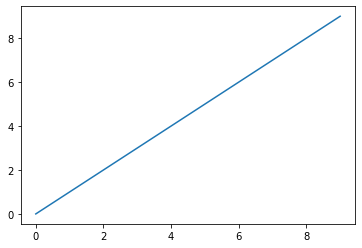

In [10]:
plt.plot(data)

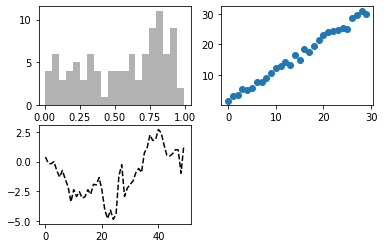

In [21]:
#Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure:
fig = plt.figure()

#You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot:
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.rand(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3* np.random.rand(30))

NameError: name 'subplots_adjust' is not defined

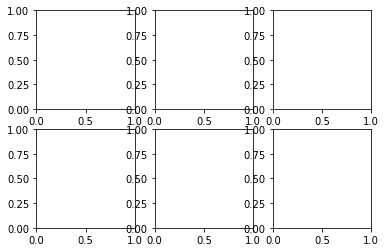

In [28]:
# will create a figure and return numpy array 
fig, axes = plt.subplots(2,3)

#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

axes

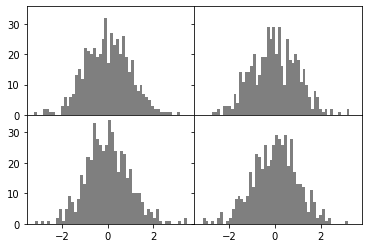

In [29]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2): 
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

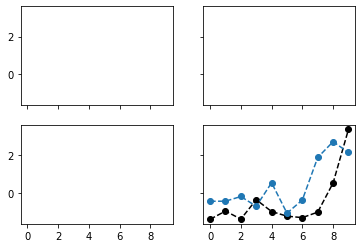

In [41]:
from numpy.random import randn
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
plt.plot(randn(10).cumsum(), 'ko--')
plt.plot(randn(10).cumsum(), 'o--')

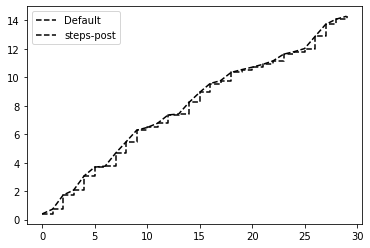

In [44]:
data = np.random.rand(30).cumsum()
plt.plot(data,'k--', label ='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label = 'steps-post')

plt.legend(loc='best')

Text(0.5, 1.0, 'first matplotlib plot')

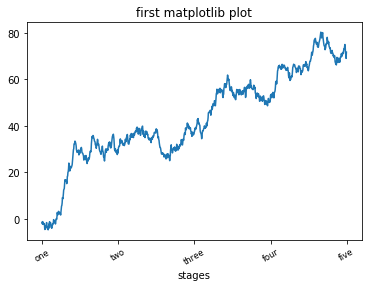

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0,250,500,750,1000])
labels =ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')
ax.set_xlabel('stages')
ax.set_title('first matplotlib plot')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75), 0.4,0.15, color='k', alpha=0.3)
circ= plt.Circle((0.7,0.2), 0.15, color='b', alpha=0.3)
pgon= plt.Polygon([[0.15,0.15], [0.35,0.4], [0.2,0.6]], color='g',alpha=0.5)

ax.add-patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Plotting with Pandas

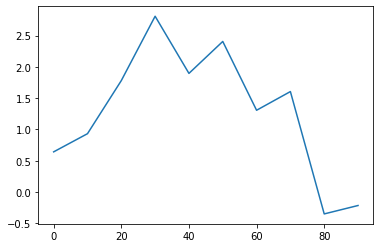

In [59]:
import pandas as pd

#he x-axis ticks and limits can be adjusted with the xticks and xlim options, and y-axis respectively with yticks and ylim
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

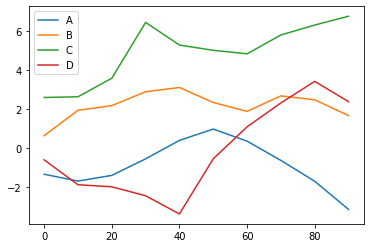

In [68]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), 
                 columns=['A','B','C','D'], index=np.arange(0,100,10))

df.plot()

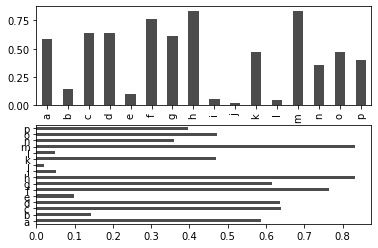

In [75]:
fig, axes = plt.subplots(2,1)
data= pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

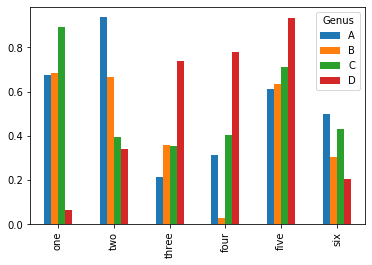

In [82]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                   columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))


df.plot.bar()

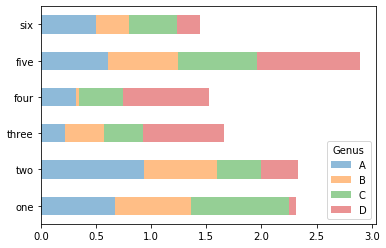

In [83]:
df.plot.barh(stacked=True, alpha=0.5)

In [6]:
import pandas as pd

tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


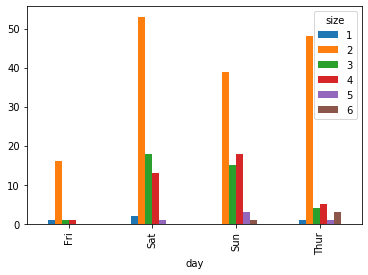

In [7]:
party_counts.plot.bar()

# Making Basic Seaborn Plots

In [8]:
import seaborn as sns

In [9]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


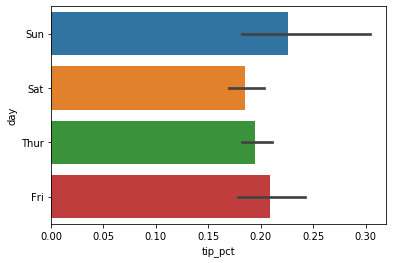

In [11]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

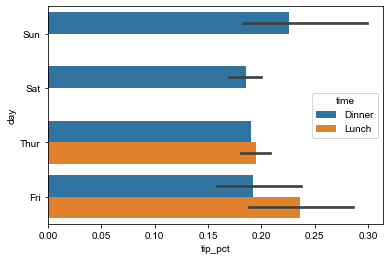

In [13]:
sns.barplot(x='tip_pct', y='day',hue='time', data=tips, orient='h')
sns.set(style='whitegrid')

## Seaborn Histograms 

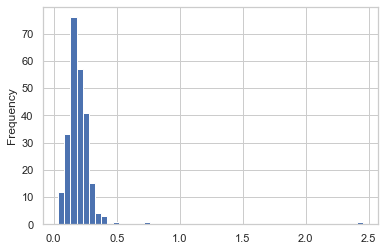

In [15]:
tips['tip_pct'].plot.hist(bins=50)

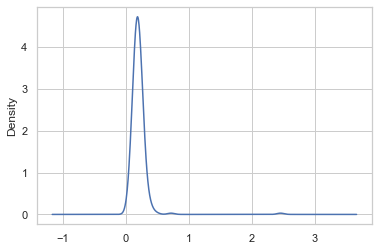

In [16]:
tips['tip_pct'].plot.density()

In [19]:
import numpy as np

comp1 = np.random.normal(0,1, size=200)
comp2 = np.random.normal(10,2, size=200)
values= pd.Series(np.concatenate([com1,comp2]))

sns.displot(values, bins=100, color='k')

NameError: name 'com1' is not defined

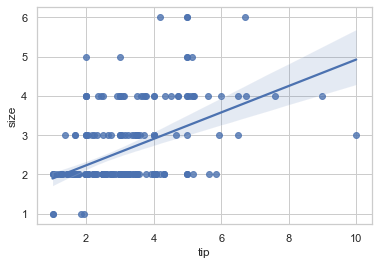

In [24]:
sns.regplot('tip','size', data=tips)



 a pairs plot or ***scatter plot matrix***. Making such a plot from scratch is a bit of work, so seaborn has a convenient pairplot function, which supports placing histograms or density estimates of each variable along the diagonal

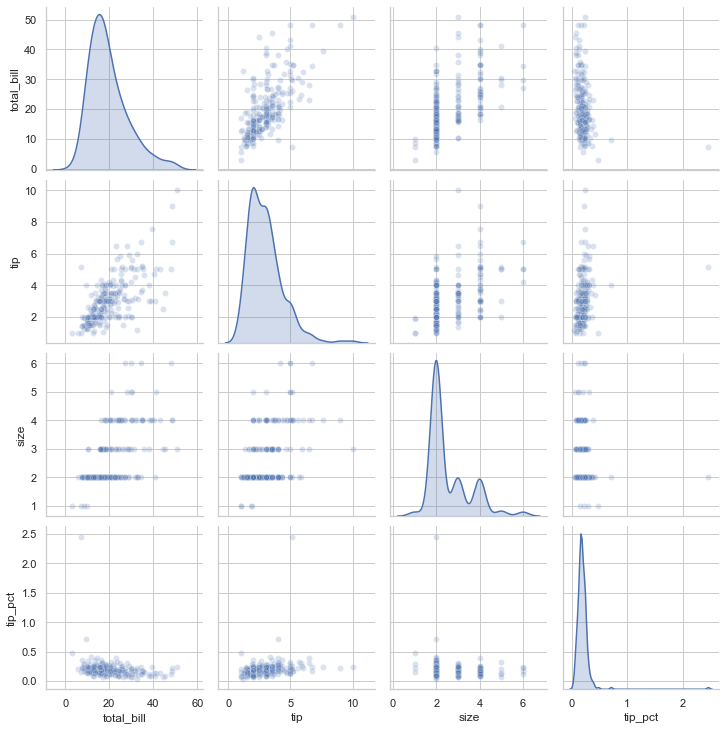

In [28]:
sns.pairplot(tips,diag_kind='kde', plot_kws={'alpha':0.2})


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



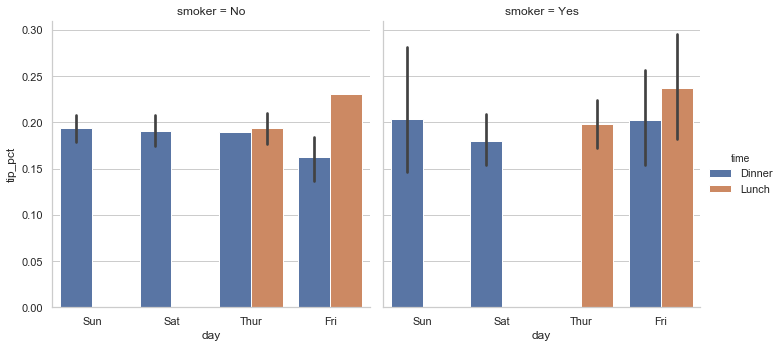

In [33]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct <1])

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



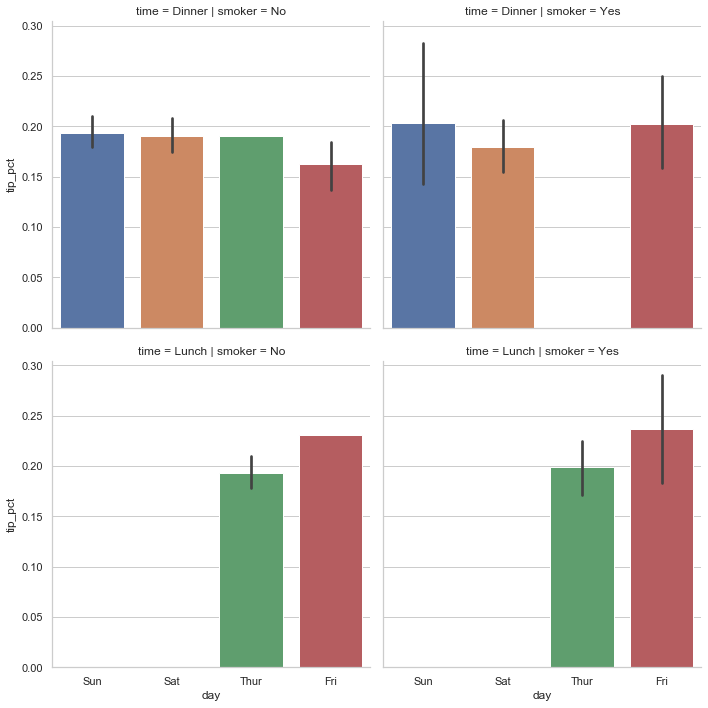

In [34]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



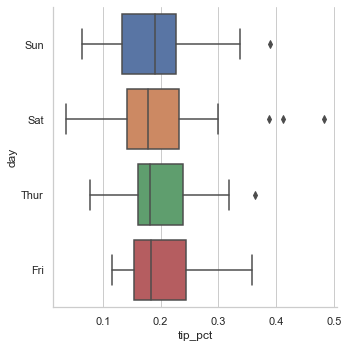

In [35]:
sns.factorplot(x='tip_pct', y ='day', kind='box', data=tips[tips.tip_pct<0.5])